#Lets download the Twiiter Streaming Data by using creating "APP" in the TwitterDeveloper and gerneratinng keys from it and extracting the Twitter Data of Ecommerce comapnies like Amazon,Flipkart and snapdeal and make sentiments of the tweets to check the competitors to set up business in India. 

In [130]:
#Import the necessary methods from tweepy library
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
import json
from textblob import TextBlob

In [131]:
#Variables that contains the user credentials to access Twitter API 
#We need place the key to extrac the data.

#access_token = "xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"
#access_token_secret = "xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"
#consumer_key = "xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"
#consumer_secret = "xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"


In [132]:
#This is a basic listener that just prints received tweets to stdout.
#class StdOutListener(StreamListener):

    #def on_data(self, data):
       # raw_twitts = json.loads(data)
        #try:
            #print (raw_twitts['text'])
        #except:
            #print('Error got')
        
    #def on_error(self, status):
       #print (status)


#if __name__ == '__main__':

    #This handles Twitter authetification and the connection to Twitter Streaming API
    #l = StdOutListener()
    #auth = OAuthHandler(consumer_key, consumer_secret)
    #auth.set_access_token(access_token, access_token_secret)
    #stream = Stream(auth, l)

    #This line filter Twitter Streams to capture data by the keywords: '@amazonIN','@Flipkart','@snapdeal'
   # stream.filter(languages=["en"],track=['@amazonIN','@Flipkart','@snapdeal''has: Mobiles & Accessories,Clothing and Accessor,HomeAppliances,Grocery,Beauty and Grooming Products'])

### The above code pulls the twitter stream data and it saved in the text file.

# Lets Import Required dependencies 

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
import re
import collections
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
import warnings
warnings.filterwarnings("ignore")

In [134]:
# Load the twitter stream data

DATASET_COLUMNS=['text','Sentiment']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('D:/Twitter_Final_Project/Twitter_Stream_data/Twitter_data.txt',encoding=DATASET_ENCODING, names=DATASET_COLUMNS)

In [135]:
tweets=df
tweets

,text,Sentiment
0,RT @chenniepii: This photo captures the beauty...,NaN
1,RT @NMLockdownsUK: Just remember everyone Covi...,NaN
2,the woman you failed to appreciate is also the...,NaN
3,being near her all the time,he disrâ¦ https://t.co/YhEaJiBs1f\t\t\t\t\t\t\t
4,RT @b_trimudehemaa: Your favourite bag shop ha...,NaN
...,...,...
2007,RT @Brand4Sales: This creamy name evokes fresh...,serving up the freshest produce
2008,Hey Team @flipkartsupport,NaN
2009,Have ordered 4.2kg of dog food but got only 3k...,NaN
2010,@Honey_Kr @yashgyy @sc0rpi025 @Vibhor1911 @Bla...,NaN


In [136]:
tweet=tweets.drop(['Sentiment'], axis=1)

tweet

,text
0,RT @chenniepii: This photo captures the beauty...
1,RT @NMLockdownsUK: Just remember everyone Covi...
2,the woman you failed to appreciate is also the...
3,being near her all the time
4,RT @b_trimudehemaa: Your favourite bag shop ha...
...,...
2007,RT @Brand4Sales: This creamy name evokes fresh...
2008,Hey Team @flipkartsupport
2009,Have ordered 4.2kg of dog food but got only 3k...
2010,@Honey_Kr @yashgyy @sc0rpi025 @Vibhor1911 @Bla...


## Lets explore the data set

In [137]:
tweet.shape

(2012, 1)

In [138]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2012 entries, 0 to 2011
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2012 non-null   object
dtypes: object(1)
memory usage: 15.8+ KB


In [139]:
tweet.columns

Index(['text'], dtype='object')

In [140]:
tweet['word_count'] = tweet['text'].apply(lambda x: len(str(x).split(" ")))
tweet[['text','word_count']].head()


,text,word_count
0,RT @chenniepii: This photo captures the beauty...,12
1,RT @NMLockdownsUK: Just remember everyone Covi...,18
2,the woman you failed to appreciate is also the...,14
3,being near her all the time,6
4,RT @b_trimudehemaa: Your favourite bag shop ha...,11


In [141]:
# The Number of characters
tweet['char_count'] = tweet['text'].str.len() ## this also includes spaces
tweet[['text','char_count']].head()

,text,char_count
0,RT @chenniepii: This photo captures the beauty...,80
1,RT @NMLockdownsUK: Just remember everyone Covi...,140
2,the woman you failed to appreciate is also the...,86
3,being near her all the time,27
4,RT @b_trimudehemaa: Your favourite bag shop ha...,84


In [142]:
tweet

,text,word_count,char_count
0,RT @chenniepii: This photo captures the beauty...,12,80
1,RT @NMLockdownsUK: Just remember everyone Covi...,18,140
2,the woman you failed to appreciate is also the...,14,86
3,being near her all the time,6,27
4,RT @b_trimudehemaa: Your favourite bag shop ha...,11,84
...,...,...,...
2007,RT @Brand4Sales: This creamy name evokes fresh...,9,60
2008,Hey Team @flipkartsupport,4,26
2009,Have ordered 4.2kg of dog food but got only 3k...,19,114
2010,@Honey_Kr @yashgyy @sc0rpi025 @Vibhor1911 @Bla...,13,116


In [143]:
#See the percentage of tweets from the initial set that have #mentions and are not retweets:
mention_tweets = tweet[~tweet['text'].str.contains("RT")  & tweet['text'].str.contains("@")]
print(f"The percentage of retweets is {round(len(mention_tweets)/len(tweet)*100)}% of all the tweets")

The percentage of retweets is 17% of all the tweets


In [144]:
#See how many tweets inside are plain text tweets (No RT or mention)
plain_text_tweets = tweet[~tweet['text'].str.contains("@")  & ~tweet['text'].str.contains("RT")]
print(f"The percentage of plain text tweets is {round(len(plain_text_tweets)/len(tweet)*100)}% of all the tweets")

The percentage of plain text tweets is 45% of all the tweets


###  Lets discover which are the most used hashtags and the most mentioned users for the company.

In [145]:
#To see the most used hashtags.
hashtags = []
hashtag_pattern = re.compile(r"#[a-zA-Z]+")
hashtag_matches = list(tweet['text'].apply(hashtag_pattern.findall))
hashtag_dict = {}
for match in hashtag_matches:
    for singlematch in match:
        if singlematch not in hashtag_dict.keys():
            hashtag_dict[singlematch] = 1
        else:
            hashtag_dict[singlematch] = hashtag_dict[singlematch]+1

### **To create a pattern for detecting a hashtag inside the text , we will create a dictionary with all the found hashtags, where the key is the hashtag text and the value is the number of times the hashtag has been posted.

In [146]:
#Making a list of the most used hashtags and their values
hashtag_ordered_list =sorted(hashtag_dict.items(), key=lambda x:x[1])
hashtag_ordered_list = hashtag_ordered_list[::-1]
#Separating the hashtags and their values into two different lists
hashtag_ordered_values = []
hashtag_ordered_keys = []
#Pick the 20 most used hashtags to plot
for item in hashtag_ordered_list[0:20]:
    hashtag_ordered_keys.append(item[0])
    hashtag_ordered_values.append(item[1])

 ###we will sort the dictionary according to the value and separate the values and the hashtags into two different lists. By doing this we can now plot the 20 most used hashtags, along with the number of times they appear.

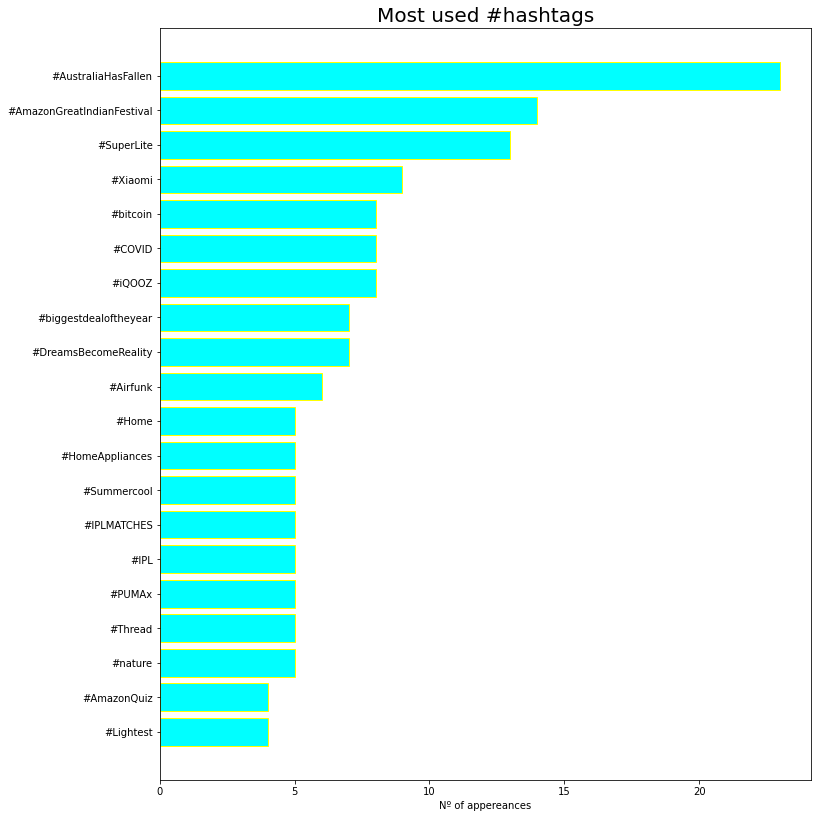

In [147]:
#Plotting a graph with the most used hashtags
fig, ax = plt.subplots(figsize = (12,12))
y_pos = np.arange(len(hashtag_ordered_keys))
ax.barh(y_pos ,list(hashtag_ordered_values)[::-1], align='center', color = 'cyan', edgecolor = 'Yellow', linewidth=1)
ax.set_yticks(y_pos)
ax.set_yticklabels(list(hashtag_ordered_keys)[::-1])
ax.set_xlabel("Nº of appereances")
ax.set_title("Most used #hashtags", fontsize = 20)
plt.tight_layout(pad=3)
plt.show()


*  As we see from the above plot as Amazon has in the secound place and No words regarding the Flipkart and Snapdeal are not been their .
 So we see that their the Amazon is the biggest competor in the Market and we just checked the Hastags only and we will check the tweets for sentiments of the competor.

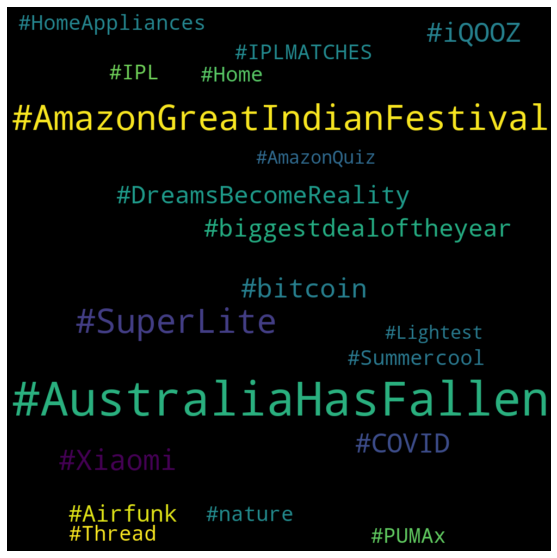

In [148]:
#Make a wordcloud plot of the most used hashtags, for this we need a #dictionary 
#where the keys are the words and the values are the number of #appearances
hashtag_ordered_dict = {}
for item in hashtag_ordered_list[0:20]:
    hashtag_ordered_dict[item[0]] = item[1]
wordcloud = WordCloud(width=1000, height=1000, random_state=21, max_font_size=200, background_color = 'black').generate_from_frequencies(hashtag_ordered_dict)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

plt.show()

# Text Preprocessing

## Lets clean the data and remove the RT from the text column

In [149]:
tweet['text'] = tweet['text'].apply(lambda x : re.sub(r'\bRT\b', '', x).strip())
tweet['text']

0       @chenniepii: This photo captures the beauty of...
1       @NMLockdownsUK: Just remember everyone Covid19...
2       the woman you failed to appreciate is also the...
3                             being near her all the time
4       @b_trimudehemaa: Your favourite bag shop has r...
                              ...                        
2007    @Brand4Sales: This creamy name evokes freshnes...
2008                            Hey Team @flipkartsupport
2009    Have ordered 4.2kg of dog food but got only 3k...
2010    @Honey_Kr @yashgyy @sc0rpi025 @Vibhor1911 @Bla...
2011    @BobLonsberry: I find it disquieting to go int...
Name: text, Length: 2012, dtype: object

In [150]:
tweet

,text,word_count,char_count
0,@chenniepii: This photo captures the beauty of...,12,80
1,@NMLockdownsUK: Just remember everyone Covid19...,18,140
2,the woman you failed to appreciate is also the...,14,86
3,being near her all the time,6,27
4,@b_trimudehemaa: Your favourite bag shop has r...,11,84
...,...,...,...
2007,@Brand4Sales: This creamy name evokes freshnes...,9,60
2008,Hey Team @flipkartsupport,4,26
2009,Have ordered 4.2kg of dog food but got only 3k...,19,114
2010,@Honey_Kr @yashgyy @sc0rpi025 @Vibhor1911 @Bla...,13,116


### Lets Remove URL's from the Text column

In [176]:
def cleaning_URLs(tweet):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',tweet)
tweet['text'] = tweet['text'].apply(lambda x: cleaning_URLs(x))
tweet['text']

0       chenniepii photo captures beauty jongdaes eyes...
1       nmlockdownsuk remember everyone covid dangerou...
2       woman failed appreciate also woman someone els...
3                                               near time
4       b_trimudehemaa favourite bag shop restocked fa...
                              ...                        
2007        brandsales creamy name evokes freshness charm
2008                             hey team flipkartsupport
2009    ordered kg dog food but got kg kindly check le...
2010    honey_kr yashgyy scrpi vibhor blacktorin nazar...
2011    boblonsberry find disquieting go grocery store...
Name: text, Length: 2012, dtype: object

 Generally, while solving an NLP problem, the first thing we do is to remove the stopwords.
 But sometimes calculating the number of stopwords can also give us some extra information which we might have been losing   before.
 Here, we have imported stopwords from NLTK, which is a basic NLP library in python.

In [191]:
# Lets find our the stopwords in the teext column and count 

from nltk.corpus import stopwords
stop = stopwords.words('english')

tweet['stopwords'] = tweet['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
tweet[['text','stopwords']].head()

,text,stopwords
0,chenniepii photo captures beauty jongdaes eyes...,0
1,nmlockdownsuk remember everyone covid dangerou...,0
2,woman failed appreciate also woman someone els...,0
3,near time,0
4,b_trimudehemaa favourite bag shop restocked fa...,0


 Lets remove stop words but creating list of stop words.

In [184]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

 Cleaning and removing the above stop words list from the text column if they are present in the tweets.

In [185]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
tweet['text'] = tweet['text'].apply(lambda text: cleaning_stopwords(text))
tweet['text'].head()

0    chenniepii photo captures beauty jongdaes eyes...
1    nmlockdownsuk remember everyone covid dangerou...
2    woman failed appreciate also woman someone els...
3                                            near time
4    b_trimudehemaa favourite bag shop restocked fa...
Name: text, dtype: object

### Lets convert the tweets in the Lower case

In [178]:
tweet['text'] = tweet['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
tweet['text'].head()

0    chenniepii photo captures beauty jongdaes eyes...
1    nmlockdownsuk remember everyone covid dangerou...
2    woman failed appreciate also woman someone els...
3                                            near time
4    b_trimudehemaa favourite bag shop restocked fa...
Name: text, dtype: object

### Lets Removing Punctuation 

In [179]:
tweet['text'] = tweet['text'].str.replace('[^\w\s\_]','')
tweet['text'].head()

0    chenniepii photo captures beauty jongdaes eyes...
1    nmlockdownsuk remember everyone covid dangerou...
2    woman failed appreciate also woman someone els...
3                                            near time
4    b_trimudehemaa favourite bag shop restocked fa...
Name: text, dtype: object

### Lets apply sentiment for the text column for the tweets

In [192]:
tweet['sentiment'] = df['text'].apply(lambda tweet: TextBlob(tweet).sentiment)

tweet.head()

,text,word_count,char_count,stopwords,sentiment
0,chenniepii photo captures beauty jongdaes eyes...,12,80,0,"(0.0, 0.0)"
1,nmlockdownsuk remember everyone covid dangerou...,18,140,0,"(-0.04999999999999999, 0.7)"
2,woman failed appreciate also woman someone els...,14,86,0,"(-0.5, 0.3)"
3,near time,6,27,0,"(0.1, 0.4)"
4,b_trimudehemaa favourite bag shop restocked fa...,11,84,0,"(0.5, 1.0)"


### Cleaning and removing Numeric numbers

In [193]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
tweet['text'] = tweet['text'].apply(lambda x: cleaning_numbers(x))
tweet['text'].head()

0    chenniepii photo captures beauty jongdaes eyes...
1    nmlockdownsuk remember everyone covid dangerou...
2    woman failed appreciate also woman someone els...
3                                            near time
4    b_trimudehemaa favourite bag shop restocked fa...
Name: text, dtype: object

In [194]:
# Appling  Stemming techinque

import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
tweet['text']= tweet['text'].apply(lambda x: stemming_on_text(x))
tweet['text'].head()

0    chenniepii photo captures beauty jongdaes eyes...
1    nmlockdownsuk remember everyone covid dangerou...
2    woman failed appreciate also woman someone els...
3                                            near time
4    b_trimudehemaa favourite bag shop restocked fa...
Name: text, dtype: object

In [195]:
# Applying Lemmatizer

lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
tweet['text'] = tweet['text'].apply(lambda x: lemmatizer_on_text(x))
tweet['text'].head()


0    chenniepii photo captures beauty jongdaes eyes...
1    nmlockdownsuk remember everyone covid dangerou...
2    woman failed appreciate also woman someone els...
3                                            near time
4    b_trimudehemaa favourite bag shop restocked fa...
Name: text, dtype: object

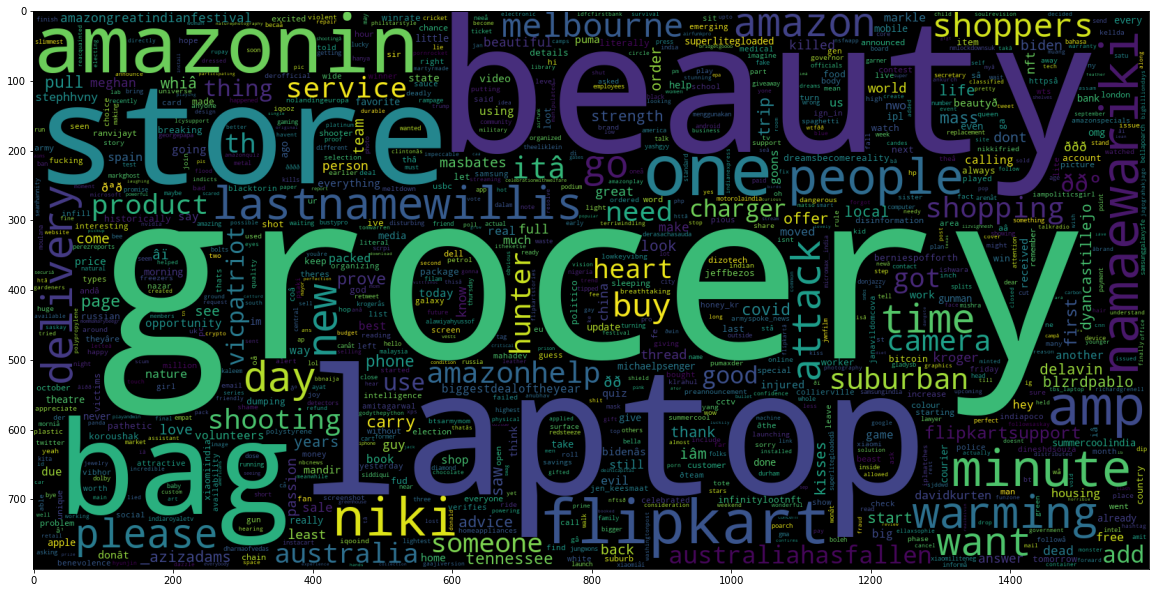

In [196]:
Twitts = tweet['text'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(Twitts))
plt.imshow(wc)

## From the above plot we see that AmazonIN and Flipkart are the two  companies are been activtely working in the INDIAN Market and we see the their support service is also good.



## But Where about the company Snapdeal is not must active and has less competition.


## We see that the Grocery,Beauty Products ,Laptops,Bags,Camera,Charger are the products are been purchased.